<a href="https://colab.research.google.com/github/EA17-ai/DLProjects/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [12]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [13]:
print(len(X_train),X_train.shape)
print(len(y_train),y_train.shape)
print(len(X_test),X_test.shape)
print(len(y_test),y_test.shape)

60000 (60000, 28, 28)
60000 (60000,)
10000 (10000, 28, 28)
10000 (10000,)


In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i],cmap=plt.get_cmap("gray"))
  plt.title(y_train[i])
  plt.axis("off")

In [21]:

# reshape dataset to have a single channel
X_train_flattened = X_train.reshape((X_train.shape[0], 28,28,1))/255
X_test_flattened = X_test.reshape((X_test.shape[0], 28,28,1))/255

In [22]:
X_train_flattened.shape

(60000, 28, 28, 1)

In [23]:
model=tf.keras.Sequential([
     tf.keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1),activation="relu",padding="same"),
     tf.keras.layers.MaxPooling2D((2,2)),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(32,activation="relu"),
     tf.keras.layers.Dense(10,activation="softmax")
    ]
)

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x=X_train_flattened,y=y_train,epochs=10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.4195 - accuracy: 0.8511
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2899 - accuracy: 0.8970
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2544 - accuracy: 0.9089
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2272 - accuracy: 0.9174
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2072 - accuracy: 0.9238
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1901 - accuracy: 0.9301
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1727 - accuracy: 0.9366
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1592 - accuracy: 0.9416
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1438 - accuracy: 0.9480
Epoch 10/10
1875/1875 [==============================] - 31s 16m

In [24]:
classnames={0:"T-shirt/top",
1	:"Trouser",
2	:"Pullover",
3	:"Dress",
4	:"Coat",
5	:"Sandal",
6	:"Shirt",
7	:"Sneaker",
8	:"Bag",
9	:"Ankle boot"}

In [42]:
y_pred=model.predict(X_test)

In [43]:
y_pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
y_pred=[np.argmax(i) for i in y_pred]

In [45]:
conf_mat=tf.math.confusion_matrix(y_test,y_pred)

In [46]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[755,   7,  27,  24,  17,   0, 140,   0,  30,   0],
       [  0, 986,   0,   4,   6,   0,   2,   0,   2,   0],
       [ 16,   1, 533,   6, 323,   0, 114,   0,   7,   0],
       [ 21,  63,  11, 788,  65,   0,  33,   0,  18,   1],
       [  1,   1,   3,  14, 955,   0,  20,   0,   6,   0],
       [  1,   0,   0,   0,   0, 980,   0,   8,   1,  10],
       [ 57,   3,  18,  16, 201,   0, 685,   0,  20,   0],
       [  0,   0,   0,   0,   0,  26,   0, 925,   2,  47],
       [  2,   1,   1,   5,   3,   0,   1,   1, 986,   0],
       [  0,   0,   0,   0,   0,  15,   0,  24,   1, 960]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

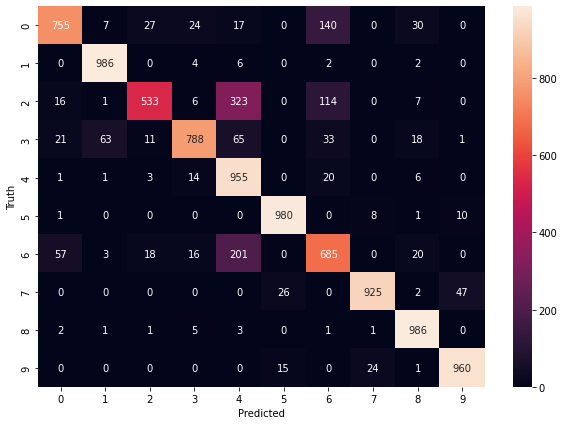

In [47]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(conf_mat,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [49]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.2835 - accuracy: 0.9090


[0.2834652364253998, 0.9089999794960022]